In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import random
import math

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, validation_curve, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
def print_num_unique_entries(df):
    for each in df.columns:
        print('Number of unique entries in', each, ':', len(df[each].unique()))
    
def print_unique_entries(df):
    for each in df.columns:
        print('Unique entries in', each, ':', df[each].unique())

---
# Question-1
---

In [4]:
anneal_data = pd.read_csv('anneal_data.csv')
anneal_test = pd.read_csv('anneal_test.csv')
anneal_df = anneal_data.append(anneal_test)
anneal_df

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,classes
0,NaN,C,A,8,0,NaN,S,NaN,0,NaN,...,NaN,NaN,COIL,0.700,610.0,0,NaN,0,NaN,3
1,NaN,C,R,0,0,NaN,S,2.0,0,NaN,...,NaN,NaN,COIL,3.200,610.0,0,NaN,0,NaN,3
2,NaN,C,R,0,0,NaN,S,2.0,0,NaN,...,NaN,NaN,SHEET,0.700,1300.0,762,NaN,0,NaN,3
3,NaN,C,A,0,60,T,NaN,NaN,0,NaN,...,NaN,NaN,COIL,2.801,385.1,0,NaN,0,NaN,3
4,NaN,C,A,0,60,T,NaN,NaN,0,NaN,...,NaN,NaN,SHEET,0.801,255.0,269,NaN,0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,C,R,0,0,NaN,S,3.0,0,NaN,...,NaN,NaN,SHEET,1.599,610.0,762,NaN,0,NaN,2
96,NaN,C,R,0,0,NaN,S,3.0,0,NaN,...,NaN,NaN,SHEET,1.601,830.0,880,NaN,0,NaN,2
97,NaN,C,V,0,0,NaN,S,2.0,0,NaN,...,NaN,NaN,SHEET,1.599,150.0,762,NaN,0,NaN,2
98,NaN,C,A,0,85,T,NaN,NaN,0,NaN,...,NaN,NaN,COIL,0.400,20.0,0,NaN,0,NaN,U


In [5]:
anneal_df.isnull().sum()

family                    772
product-type                0
steel                      86
carbon                      0
hardness                    0
temper_rolling            761
condition                 303
formability               318
strength                    0
non-ageing                793
surface-finish            889
surface-quality           244
enamelability             882
bc                        897
bf                        769
bt                        824
bw/me                     687
bl                        749
m                         898
chrom                     872
phos                      891
cbond                     824
marvi                     898
exptl                     896
ferro                     868
corr                      898
blue/bright/varn/clean    892
lustre                    847
jurofm                    898
s                         898
p                         898
shape                       0
thick                       0
width     

In [6]:
drop_cols = []
null_col_dict = anneal_df.isnull().sum().to_dict()
for each in null_col_dict.keys():
    if null_col_dict[each] > (898//2):
        drop_cols.append(each)
drop_cols

['family',
 'temper_rolling',
 'non-ageing',
 'surface-finish',
 'enamelability',
 'bc',
 'bf',
 'bt',
 'bw/me',
 'bl',
 'm',
 'chrom',
 'phos',
 'cbond',
 'marvi',
 'exptl',
 'ferro',
 'corr',
 'blue/bright/varn/clean',
 'lustre',
 'jurofm',
 's',
 'p',
 'oil',
 'packing']

In [7]:
anneal_df = anneal_df.drop(drop_cols, axis=1)
anneal_df

,product-type,steel,carbon,hardness,condition,formability,strength,surface-quality,shape,thick,width,len,bore,classes
0,C,A,8,0,S,NaN,0,G,COIL,0.700,610.0,0,0,3
1,C,R,0,0,S,2.0,0,E,COIL,3.200,610.0,0,0,3
2,C,R,0,0,S,2.0,0,E,SHEET,0.700,1300.0,762,0,3
3,C,A,0,60,NaN,NaN,0,G,COIL,2.801,385.1,0,0,3
4,C,A,0,60,NaN,NaN,0,G,SHEET,0.801,255.0,269,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,C,R,0,0,S,3.0,0,NaN,SHEET,1.599,610.0,762,0,2
96,C,R,0,0,S,3.0,0,NaN,SHEET,1.601,830.0,880,0,2
97,C,V,0,0,S,2.0,0,NaN,SHEET,1.599,150.0,762,0,2
98,C,A,0,85,NaN,NaN,0,G,COIL,0.400,20.0,0,0,U


### Data Imputation

In [8]:
# storing most frequently occuring value in each column
col_modes_dict = anneal_df.mode().to_dict()

In [9]:
cols_to_modify = []
null_col_dict = anneal_df.isnull().sum().to_dict()
for each in null_col_dict.keys():
    if null_col_dict[each] > 0:
        cols_to_modify.append(each)
cols_to_modify

['steel', 'condition', 'formability', 'surface-quality']

In [10]:
for each in cols_to_modify:
    anneal_df[each] = anneal_df[each].replace(np.nan, col_modes_dict[each][0])

In [11]:
anneal_df

,product-type,steel,carbon,hardness,condition,formability,strength,surface-quality,shape,thick,width,len,bore,classes
0,C,A,8,0,S,2.0,0,G,COIL,0.700,610.0,0,0,3
1,C,R,0,0,S,2.0,0,E,COIL,3.200,610.0,0,0,3
2,C,R,0,0,S,2.0,0,E,SHEET,0.700,1300.0,762,0,3
3,C,A,0,60,S,2.0,0,G,COIL,2.801,385.1,0,0,3
4,C,A,0,60,S,2.0,0,G,SHEET,0.801,255.0,269,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,C,R,0,0,S,3.0,0,E,SHEET,1.599,610.0,762,0,2
96,C,R,0,0,S,3.0,0,E,SHEET,1.601,830.0,880,0,2
97,C,V,0,0,S,2.0,0,E,SHEET,1.599,150.0,762,0,2
98,C,A,0,85,S,2.0,0,G,COIL,0.400,20.0,0,0,U


In [12]:
anneal_df.isnull().sum()

product-type       0
steel              0
carbon             0
hardness           0
condition          0
formability        0
strength           0
surface-quality    0
shape              0
thick              0
width              0
len                0
bore               0
classes            0
dtype: int64

In [13]:
anneal_df = anneal_df.drop('product-type', axis=1)

In [14]:
anneal_df

,steel,carbon,hardness,condition,formability,strength,surface-quality,shape,thick,width,len,bore,classes
0,A,8,0,S,2.0,0,G,COIL,0.700,610.0,0,0,3
1,R,0,0,S,2.0,0,E,COIL,3.200,610.0,0,0,3
2,R,0,0,S,2.0,0,E,SHEET,0.700,1300.0,762,0,3
3,A,0,60,S,2.0,0,G,COIL,2.801,385.1,0,0,3
4,A,0,60,S,2.0,0,G,SHEET,0.801,255.0,269,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,R,0,0,S,3.0,0,E,SHEET,1.599,610.0,762,0,2
96,R,0,0,S,3.0,0,E,SHEET,1.601,830.0,880,0,2
97,V,0,0,S,2.0,0,E,SHEET,1.599,150.0,762,0,2
98,A,0,85,S,2.0,0,G,COIL,0.400,20.0,0,0,U


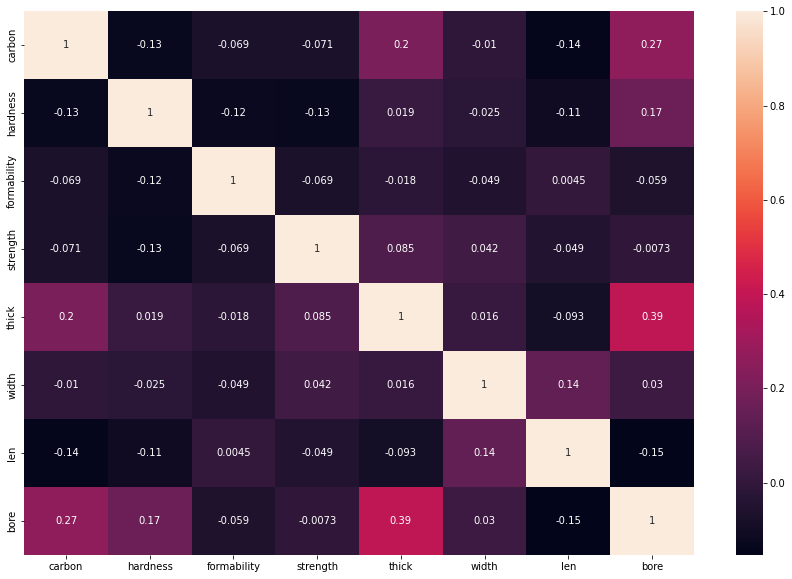

In [15]:
fig = plt.figure(figsize=(15,10))
dataplot = sns.heatmap(anneal_df.corr(), annot=True)
plt.show()

In [16]:
print_num_unique_entries(anneal_df)

Number of unique entries in steel : 7
Number of unique entries in carbon : 10
Number of unique entries in hardness : 7
Number of unique entries in condition : 2
Number of unique entries in formability : 4
Number of unique entries in strength : 8
Number of unique entries in surface-quality : 4
Number of unique entries in shape : 2
Number of unique entries in thick : 50
Number of unique entries in width : 68
Number of unique entries in len : 24
Number of unique entries in bore : 3
Number of unique entries in classes : 5


In [17]:
print_unique_entries(anneal_df)

Unique entries in steel : ['A' 'R' 'K' 'S' 'W' 'M' 'V']
Unique entries in carbon : [ 8  0 10 55 70  3  4 45  6 65]
Unique entries in hardness : [ 0 60 45 80 70 85 50]
Unique entries in condition : ['S' 'A']
Unique entries in formability : [2. 3. 1. 5.]
Unique entries in strength : [  0 310 350 500 600 400 300 700]
Unique entries in surface-quality : ['G' 'E' 'D' 'F']
Unique entries in shape : ['COIL' 'SHEET']
Unique entries in thick : [0.7   3.2   2.801 0.801 1.6   0.699 3.3   1.    1.2   0.3   0.6   4.
 3.201 0.8   0.501 1.001 0.5   1.4   0.75  1.399 0.651 0.799 0.601 2.5
 1.599 0.599 0.301 0.4   3.5   2.    1.201 1.5   0.999 0.25  0.451 1.09
 1.1   1.601 0.9   0.901 2.3   1.3   1.9   0.321 1.299 2.2   2.8   2.501
 3.    0.24 ]
Unique entries in width : [ 610.  1300.   385.1  255.   152.  1320.   609.9 1220.   600.  1320.1
 1200.1   50.   356.   900.   450.    20.   374.9 1274.9  150.   500.
  515.   335.   250.  1130.   609.  1250.   640.  1090.    25.  1100.
  520.    75.  1275.  15

In [18]:
anneal_df.dtypes

steel               object
carbon               int64
hardness             int64
condition           object
formability        float64
strength             int64
surface-quality     object
shape               object
thick              float64
width              float64
len                  int64
bore                 int64
classes             object
dtype: object

In [19]:
anneal_df['classes'] = anneal_df['classes'].replace('U', '6')

In [20]:
print_unique_entries(anneal_df)

Unique entries in steel : ['A' 'R' 'K' 'S' 'W' 'M' 'V']
Unique entries in carbon : [ 8  0 10 55 70  3  4 45  6 65]
Unique entries in hardness : [ 0 60 45 80 70 85 50]
Unique entries in condition : ['S' 'A']
Unique entries in formability : [2. 3. 1. 5.]
Unique entries in strength : [  0 310 350 500 600 400 300 700]
Unique entries in surface-quality : ['G' 'E' 'D' 'F']
Unique entries in shape : ['COIL' 'SHEET']
Unique entries in thick : [0.7   3.2   2.801 0.801 1.6   0.699 3.3   1.    1.2   0.3   0.6   4.
 3.201 0.8   0.501 1.001 0.5   1.4   0.75  1.399 0.651 0.799 0.601 2.5
 1.599 0.599 0.301 0.4   3.5   2.    1.201 1.5   0.999 0.25  0.451 1.09
 1.1   1.601 0.9   0.901 2.3   1.3   1.9   0.321 1.299 2.2   2.8   2.501
 3.    0.24 ]
Unique entries in width : [ 610.  1300.   385.1  255.   152.  1320.   609.9 1220.   600.  1320.1
 1200.1   50.   356.   900.   450.    20.   374.9 1274.9  150.   500.
  515.   335.   250.  1130.   609.  1250.   640.  1090.    25.  1100.
  520.    75.  1275.  15

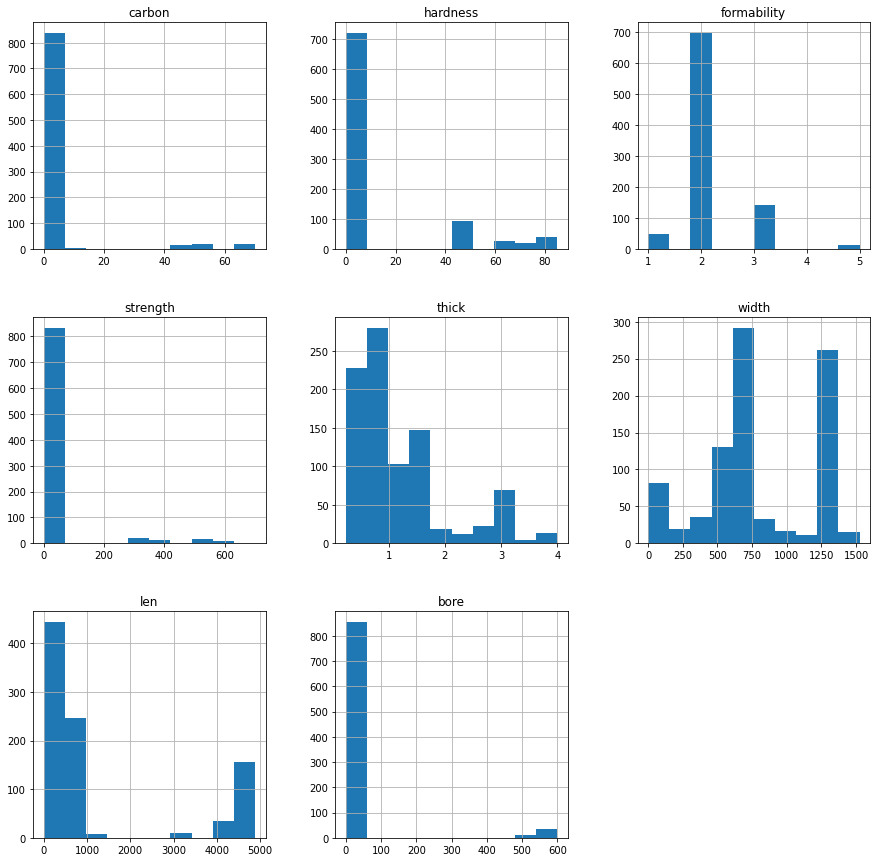

In [21]:
anneal_df.hist(figsize=(15,15))
plt.show()

In [22]:
categorical_features = ['steel', 'condition', 'surface-quality', 'shape', 'classes']

In [23]:
for each in categorical_features:
    anneal_df[each] = anneal_df[each].astype('category')
    anneal_df[each] = anneal_df[each].cat.codes

In [24]:
anneal_df

,steel,carbon,hardness,condition,formability,strength,surface-quality,shape,thick,width,len,bore,classes
0,0,8,0,1,2.0,0,3,0,0.700,610.0,0,0,2
1,3,0,0,1,2.0,0,1,0,3.200,610.0,0,0,2
2,3,0,0,1,2.0,0,1,1,0.700,1300.0,762,0,2
3,0,0,60,1,2.0,0,3,0,2.801,385.1,0,0,2
4,0,0,60,1,2.0,0,3,1,0.801,255.0,269,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3,0,0,1,3.0,0,1,1,1.599,610.0,762,0,1
96,3,0,0,1,3.0,0,1,1,1.601,830.0,880,0,1
97,5,0,0,1,2.0,0,1,1,1.599,150.0,762,0,1
98,0,0,85,1,2.0,0,3,0,0.400,20.0,0,0,4


In [25]:
continuous_features = ['carbon', 'hardness', 'strength', 'thick', 'width', 'len']

In [26]:
X_std = anneal_df[anneal_df.columns.tolist()[:-1]].copy()
y_std = anneal_df['classes'].copy()

X_non_std = X_std.copy()
y_non_std = y_std.copy()

In [27]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X_std)
X_std = pd.DataFrame(X_std)
X_std.columns = X_non_std.columns

In [28]:
X_std

,steel,carbon,hardness,condition,formability,strength,surface-quality,shape,thick,width,len,bore
0,-0.752614,0.318418,-0.476060,0.215917,-0.259109,-0.26693,1.580346,-1.086099,-0.572569,-0.421242,-0.675323,-0.226311
1,1.102411,-0.265132,-0.476060,0.215917,-0.259109,-0.26693,-0.548912,-1.086099,2.298608,-0.421242,-0.675323,-0.226311
2,1.102411,-0.265132,-0.476060,0.215917,-0.259109,-0.26693,-0.548912,0.920726,-0.572569,1.281958,-0.267914,-0.226311
3,-0.752614,-0.265132,1.949482,0.215917,-0.259109,-0.26693,1.580346,-1.086099,1.840368,-0.976386,-0.675323,-0.226311
4,-0.752614,-0.265132,1.949482,0.215917,-0.259109,-0.26693,1.580346,0.920726,-0.456573,-1.297525,-0.531500,-0.226311
...,...,...,...,...,...,...,...,...,...,...,...,...
893,1.102411,-0.265132,-0.476060,0.215917,1.558704,-0.26693,-0.548912,0.920726,0.459906,-0.421242,-0.267914,-0.226311
894,1.102411,-0.265132,-0.476060,0.215917,1.558704,-0.26693,-0.548912,0.920726,0.462203,0.121808,-0.204824,-0.226311
895,2.339094,-0.265132,-0.476060,0.215917,-0.259109,-0.26693,-0.548912,0.920726,0.459906,-1.556708,-0.267914,-0.226311
896,-0.752614,-0.265132,2.960124,0.215917,-0.259109,-0.26693,1.580346,-1.086099,-0.917110,-1.877600,-0.675323,-0.226311


### Train-test split

In [29]:
train_X_std, test_X_std, train_y_std, test_y_std = train_test_split(X_std, y_std, test_size=0.35, random_state=0)
train_X_non_std, test_X_non_std, train_y_non_std, test_y_non_std = train_test_split(X_non_std, y_non_std, test_size=0.35, random_state=0)

### On standardised data

In [30]:
rf_model_1 = RandomForestClassifier()
bagging_model_1 = BaggingClassifier()
svm_clf_1 = SVC()

rf_model_1.fit(train_X_std, train_y_std)
bagging_model_1.fit(train_X_std, train_y_std)
svm_clf_1.fit(train_X_std, train_y_std)

SVC()

In [31]:
rf_model_1.score(test_X_std, test_y_std)

0.9333333333333333

In [32]:
bagging_model_1.score(test_X_std, test_y_std)

0.9111111111111111

In [33]:
svm_clf_1.score(test_X_std, test_y_std)

0.8507936507936508

### On non-standardized data

In [34]:
rf_model_2 = RandomForestClassifier()
bagging_model_2 = BaggingClassifier()
svm_clf_2 = SVC()

rf_model_2.fit(train_X_non_std, train_y_non_std)
bagging_model_2.fit(train_X_non_std, train_y_non_std)
svm_clf_2.fit(train_X_non_std, train_y_non_std)

SVC()

In [35]:
rf_model_2.score(test_X_non_std, test_y_non_std)

0.9365079365079365

In [36]:
bagging_model_2.score(test_X_non_std, test_y_non_std)

0.9111111111111111

In [37]:
svm_clf_2.score(test_X_non_std, test_y_non_std)

0.7968253968253968

## 5-fold cross-validation scores and plots

In [38]:
def cross_validation_plots(models, X, y, model_names, title, n_splits=5):
    kf = KFold(n_splits=n_splits)
    x_array = [x+1 for x in range(n_splits)]
    for each in range(len(models)):
        cv_score = np.array(cross_val_score(models[each], X, y, cv=kf))
        print(f'{n_splits}-fold-cross-validation scores for {model_names[each]}: {cv_score}')
        plt.plot(x_array, cv_score, label=model_names[each])
    plt.legend()
    plt.xlabel('fold no.')
    plt.ylabel('cross validation accuracy scores')
    plt.title(title)
    plt.show()

In [39]:
model_names = ['RandomForestClassifier', 'BaggingClassifier', 'SVMClassifier']
models = [RandomForestClassifier(), BaggingClassifier(), SVC()]

### On standardised data

5-fold-cross-validation scores for RandomForestClassifier: [0.91111111 0.95555556 0.93333333 0.95530726 0.96089385]
5-fold-cross-validation scores for BaggingClassifier: [0.94444444 0.95       0.93333333 0.94972067 0.94972067]
5-fold-cross-validation scores for SVMClassifier: [0.80555556 0.88888889 0.81111111 0.83240223 0.91061453]


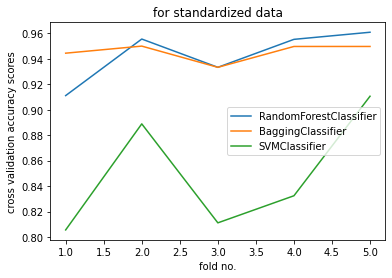

In [40]:
cross_validation_plots(models, X_std, y_std, model_names, title='for standardized data')

### On non-standardised data

5-fold-cross-validation scores for RandomForestClassifier: [0.88888889 0.95555556 0.93333333 0.94413408 0.96089385]
5-fold-cross-validation scores for BaggingClassifier: [0.93333333 0.95       0.93333333 0.94413408 0.95530726]
5-fold-cross-validation scores for SVMClassifier: [0.75       0.77777778 0.74444444 0.75418994 0.78212291]


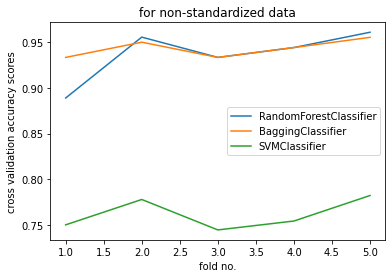

In [41]:
cross_validation_plots(models, X_non_std, y_non_std, model_names, title='for non-standardized data')

## Principal Component Analysis implementation from scratch

In [42]:
class PCA:
    def __init__(self, n_components=2):
        '''
        Input: number of principle-components
        
        Constructor method for the Principle Component Analysis class
        '''
        self.n_components = n_components
    
    
    def fit(self, df):
        '''
        Input: data/dataframe
        
        Stores the input data that is needed to be transformed
        '''
        self.df = df
        self.num_samples, self.num_features = df.shape
        
        eig_vals, eig_vecs = self.eigen_values_and_vectors(self.df)
        self.eigmat = eig_vecs[:,:self.n_components]
        
    
    def mean_of_features(self, df):
        '''
        Input: data/dataframe
        
        Returns numpy array of the means of the features of the input
        '''
        _df = np.array(df)
        return np.mean(_df, axis=0)
    
    
    def std_of_features(self, df):
        '''
        Input: data/dataframe
        
        Returns the numpy array of the standard deviations of the features of the input
        '''
        _df = np.array(df)
        return np.std(_df, axis=0)

    
    def covariance_matrix(self, df):
        '''
        Input: data/dataframe
        
        Returns the covariance matrix of the input
        '''
        num_samples, num_features = df.shape
        
        _df = np.array(df)
        feature_means = self.mean_of_features(df)
        _df_transpose = _df.T
        
        for feature in range(num_features):
            _df_transpose[feature] = _df_transpose[feature] - feature_means[feature]
            
        cov_mat = np.zeros((num_features, num_features))
        
        for feature1 in range(num_features):
            for feature2 in range(num_features):
                cov_mat[feature1][feature2] = np.sum(_df_transpose[feature1]*_df_transpose[feature2])/(num_samples-1)
        
        return cov_mat
    
    
    def eigen_values_and_vectors(self, df):
        '''
        Input: data/dataframe
        
        Returns the (eigen values, eigen vectors) for the covariance matrix of the input
        '''
        eig_val, eig_vec = np.linalg.eig(self.covariance_matrix(df))
        
        # sorting the eigen values in descending order and corresponding order in eigen vectors
        idx = eig_val.argsort()[::-1]
        eig_val = eig_val[idx]
        eig_vec = eig_vec[:,idx]
        
        return eig_val, eig_vec
    
    
    def transform(self, df):
        '''
        Input: dataframe / dataset
        
        Returns transformed input as a pandas dataframe
        '''
        if len(df.shape) == 1:
            return np.dot(df, self.eigmat)
        
        transformed_df = pd.DataFrame(np.dot(df, self.eigmat))
        transformed_df.columns = [f'component-{num+1}' for num in range(self.n_components)]
       
        return transformed_df

    
    def plot_change_in_variance(self):
        '''
        Plots a bar graph to show the change in variance as you increase the number of components
        '''
        eig_vals, eig_vecs = self.eigen_values_and_vectors(self.df)
        
        explained_var_array = list()
        components_array = list()
        
        # num_components = len(eig_vals)
        num_components = self.n_components
        
        cummulative_sum = 0
        for each in range(len(eig_vals)):
            cummulative_sum += eig_vals[each]
            explained_var_array.append(cummulative_sum)
            
        explained_var_array = np.array(explained_var_array)/np.sum(eig_vals)
        
        fig = plt.figure(figsize=(10, 5))
        components_array = [each+1 for each in range(len(eig_vals))]
        
        plt.subplot(1, 2, 1)
        plt.bar(components_array, explained_var_array, alpha=0.5, label='cumulative explained variance')
        plt.xlabel('number of principle-components')
        plt.ylabel('cumulative explained variance')
        
        plt.subplot(1, 2, 2)
        plt.bar(components_array[:num_components], (eig_vals/np.sum(eig_vals))[:num_components], alpha=0.5, label='individual explained variance')
        plt.xlabel('number of principle-components')
        plt.ylabel('individual explained variance')
        
        plt.show()
        
        
    def scatter_plot(self):
        '''
        Plots a scatter plot to show the direction of the eigenvectors along with the data points
        '''
        eig_vals, eig_vecs = self.eigen_values_and_vectors(self.df)
        
        fig = plt.figure(figsize=(10,10))
        
        colors = ['y', 'm', 'r', 'g', 'b']
        
        # colors = []
        # for each in range(self.n_components):
            # r = random.randint(30,225)
            # g = random.randint(30,225)
            # b = random.randint(30,225)
            # colors.append((r,g,b))
            # colors.append("#"+''.join([random.choice('ABCDEF0123456789') for num in range(6)]))
        
        df = self.transform(self.df)
        comp1 = df['component-1']
        comp2 = df['component-2']
        plt.scatter(comp1, comp2, label='data points', alpha=0.5)
        
        h = 10
        x1 = abs(comp1.min())
        x2 = abs(comp1.max())
        x_range = max(x1, x2)*1.1
        
        y1 = abs(comp2.min())
        y2 = abs(comp2.max())
        y_range = max(y1, y2)*1.1
        
        for each in range(self.n_components):
            plt.quiver(0, 0, eig_vecs[each][0]*1e3, eig_vecs[each][1]*1e3, scale=5, label=f'eigen-vector-{each+1}', color=[colors[each]])
        
        plt.xlim(-x_range,x_range)
        plt.ylim(-y_range,y_range)
        plt.xlabel('component-1')
        plt.ylabel('component-2')
        plt.legend()
        plt.show()
        

### For standardized data

In [43]:
std_pca = PCA(n_components=2)
std_pca.fit(X_std)
pca_std_data = std_pca.transform(X_std)
pca_std_data

,component-1,component-2
0,1.163181,0.960966
1,1.097060,-1.580822
2,-1.287622,-0.746128
3,2.390698,1.311513
4,0.614576,2.256911
...,...,...
893,-0.929731,-1.119177
894,-1.043948,-1.210472
895,-0.731233,-1.333581
896,1.977513,2.967215


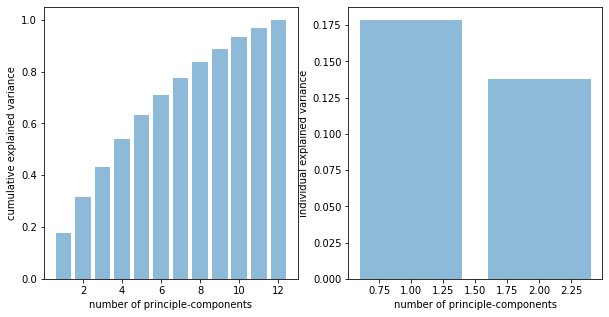

In [44]:
std_pca.plot_change_in_variance()

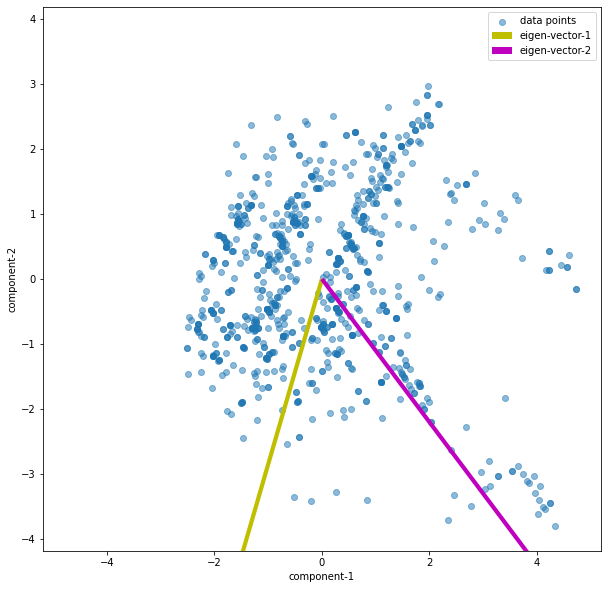

In [45]:
std_pca.scatter_plot()

### For non-standardized data

In [46]:
non_std_pca = PCA(n_components=2)
non_std_pca.fit(X_non_std)
pca_non_std_data = non_std_pca.transform(X_non_std)
pca_non_std_data

,component-1,component-2
0,19.167342,609.534733
1,19.175703,609.533343
2,802.445806,1275.229852
3,12.021084,384.769854
4,276.783049,246.376858
...,...,...
893,780.755225,585.759030
894,905.605900,801.908729
895,766.294979,126.112689
896,0.508843,19.935323


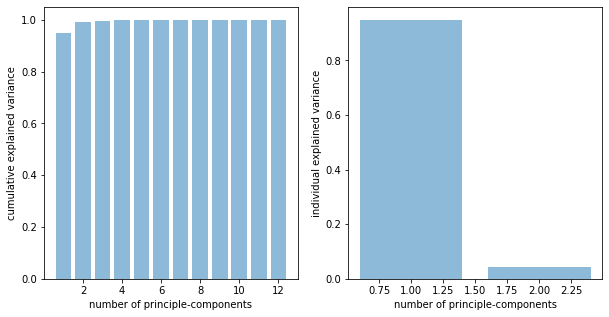

In [47]:
non_std_pca.plot_change_in_variance()

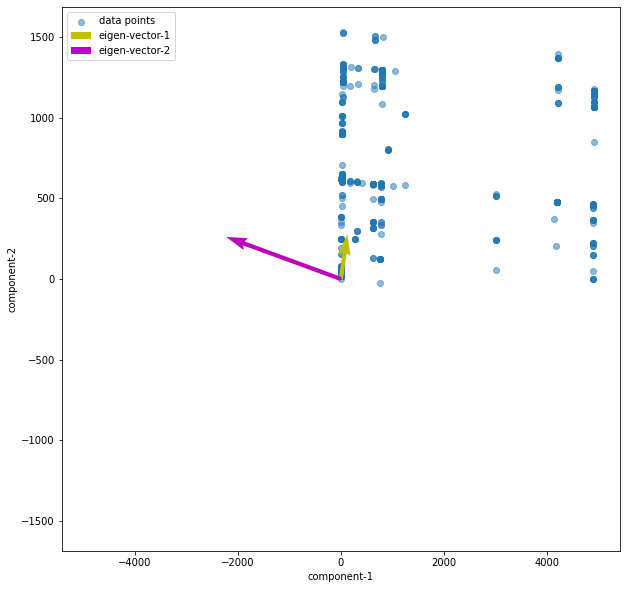

In [48]:
non_std_pca.scatter_plot()

## Training classification models and 5-fold cross-validation score

In [49]:
model_names = ['RandomForestClassifier', 'BaggingClassifier', 'SVMClassifier']
models = [RandomForestClassifier(), BaggingClassifier(), SVC()]

### For standardized data

5-fold-cross-validation scores for RandomForestClassifier: [0.79444444 0.87777778 0.8        0.8603352  0.8603352 ]
5-fold-cross-validation scores for BaggingClassifier: [0.79444444 0.83888889 0.80555556 0.84357542 0.8603352 ]
5-fold-cross-validation scores for SVMClassifier: [0.75       0.77777778 0.74444444 0.75418994 0.78212291]


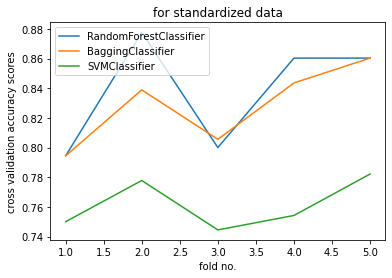

In [50]:
cross_validation_plots(models, pca_std_data, y_std, model_names, title='for standardized data')

### For non-standardized data

5-fold-cross-validation scores for RandomForestClassifier: [0.73333333 0.83888889 0.82777778 0.79888268 0.83240223]
5-fold-cross-validation scores for BaggingClassifier: [0.71666667 0.83333333 0.81111111 0.7877095  0.81005587]
5-fold-cross-validation scores for SVMClassifier: [0.75       0.77777778 0.74444444 0.75418994 0.78212291]


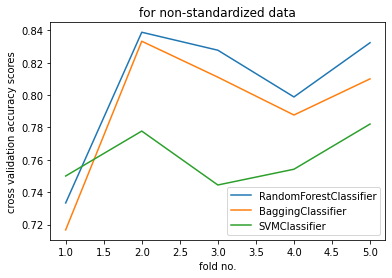

In [51]:
cross_validation_plots(models, pca_non_std_data, y_non_std, model_names, title='for non-standardized data')

In [52]:
def evaluation_metrics_before_PCA(models, model_names, train_X, train_y, test_X, test_y):
    print('Before PCA:-')
    for each in range(len(models)):
        model = models[each]
        model.fit(train_X, train_y)
        print(f'for {model_names[each]}:-')
        pred_y = model.predict(test_X)
        target_names = [f'class-{Class}' for Class in np.unique(train_y)]
        score = model.score(test_X, test_y)
        print(f'Accuracy score: {score}')
        print(f'Classification-report:-')
        print(classification_report(test_y, pred_y, target_names=target_names))
        print('-'*100)

In [53]:
def evaluation_metrics_after_PCA(models, model_names, train_X, train_y, test_X, test_y, n_components=3):
    print('After PCA:-')
    for each in range(len(models)):
        pca = PCA(n_components=n_components)
        pca.fit(train_X)
        pca_train_X = pca.transform(train_X)
        pca_test_X = pca.transform(test_X)

        model = models[each]
        model.fit(pca_train_X, train_y)
        print(f'for {model_names[each]}:-')
        pred_y = model.predict(pca_test_X)
        target_names = [f'class-{Class}' for Class in np.unique(train_y)]
        score = model.score(pca_test_X, test_y)
        print(f'Accuracy score: {score}')
        print(f'Classification-report:-')
        print(classification_report(test_y, pred_y, target_names=target_names))
        print('-'*100)

## for standardized data

### before PCA

In [54]:
evaluation_metrics_before_PCA(models, model_names, train_X_std, train_y_std, test_X_std, test_y_std)

Before PCA:-
for RandomForestClassifier:-
Accuracy score: 0.946031746031746
Classification-report:-
              precision    recall  f1-score   support

     class-0       1.00      1.00      1.00         2
     class-1       0.70      0.81      0.75        26
     class-2       0.98      0.95      0.97       251
     class-3       0.86      1.00      0.93        19
     class-4       1.00      1.00      1.00        17

    accuracy                           0.95       315
   macro avg       0.91      0.95      0.93       315
weighted avg       0.95      0.95      0.95       315

----------------------------------------------------------------------------------------------------
for BaggingClassifier:-
Accuracy score: 0.9238095238095239
Classification-report:-
              precision    recall  f1-score   support

     class-0       1.00      1.00      1.00         2
     class-1       0.61      0.77      0.68        26
     class-2       0.97      0.93      0.95       251
     class

### after PCA

In [55]:
evaluation_metrics_after_PCA(models, model_names, train_X_std, train_y_std, test_X_std, test_y_std)

After PCA:-
for RandomForestClassifier:-
Accuracy score: 0.8666666666666667
Classification-report:-
              precision    recall  f1-score   support

     class-0       1.00      0.50      0.67         2
     class-1       0.71      0.65      0.68        26
     class-2       0.90      0.94      0.92       251
     class-3       0.62      0.68      0.65        19
     class-4       1.00      0.35      0.52        17

    accuracy                           0.87       315
   macro avg       0.84      0.63      0.69       315
weighted avg       0.87      0.87      0.86       315

----------------------------------------------------------------------------------------------------
for BaggingClassifier:-
Accuracy score: 0.8444444444444444
Classification-report:-
              precision    recall  f1-score   support

     class-0       1.00      0.50      0.67         2
     class-1       0.51      0.73      0.60        26
     class-2       0.91      0.89      0.90       251
     class

## for non-standardized data

### before PCA

In [56]:
evaluation_metrics_before_PCA(models, model_names, train_X_non_std, train_y_non_std, test_X_non_std, test_y_non_std)

Before PCA:-
for RandomForestClassifier:-
Accuracy score: 0.9396825396825397
Classification-report:-
              precision    recall  f1-score   support

     class-0       1.00      1.00      1.00         2
     class-1       0.69      0.77      0.73        26
     class-2       0.98      0.95      0.96       251
     class-3       0.83      1.00      0.90        19
     class-4       1.00      1.00      1.00        17

    accuracy                           0.94       315
   macro avg       0.90      0.94      0.92       315
weighted avg       0.94      0.94      0.94       315

----------------------------------------------------------------------------------------------------
for BaggingClassifier:-
Accuracy score: 0.9142857142857143
Classification-report:-
              precision    recall  f1-score   support

     class-0       1.00      1.00      1.00         2
     class-1       0.54      0.77      0.63        26
     class-2       0.97      0.92      0.94       251
     clas

### after PCA

In [57]:
evaluation_metrics_after_PCA(models, model_names, train_X_non_std, train_y_non_std, test_X_non_std, test_y_non_std)

After PCA:-
for RandomForestClassifier:-
Accuracy score: 0.8253968253968254
Classification-report:-
              precision    recall  f1-score   support

     class-0       0.50      0.50      0.50         2
     class-1       0.47      0.65      0.55        26
     class-2       0.90      0.88      0.89       251
     class-3       0.65      0.68      0.67        19
     class-4       0.67      0.47      0.55        17

    accuracy                           0.83       315
   macro avg       0.64      0.64      0.63       315
weighted avg       0.84      0.83      0.83       315

----------------------------------------------------------------------------------------------------
for BaggingClassifier:-
Accuracy score: 0.8126984126984127
Classification-report:-
              precision    recall  f1-score   support

     class-0       0.50      0.50      0.50         2
     class-1       0.42      0.62      0.50        26
     class-2       0.89      0.88      0.88       251
     class

## Finding the optimal number of principal components

### (Completed previously)

---
# Question-2
---

In [58]:
wines_df = pd.read_csv('wine_data.csv')
wines_df

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [59]:
wines_df.isnull().sum()

class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [60]:
wines_df.dtypes

class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [61]:
print_num_unique_entries(wines_df)

Number of unique entries in class : 3
Number of unique entries in Alcohol : 126
Number of unique entries in Malic acid : 133
Number of unique entries in Ash : 79
Number of unique entries in Alcalinity of ash : 63
Number of unique entries in Magnesium : 53
Number of unique entries in Total phenols : 97
Number of unique entries in Flavanoids : 132
Number of unique entries in Nonflavanoid phenols : 39
Number of unique entries in Proanthocyanins : 101
Number of unique entries in Color intensity : 132
Number of unique entries in Hue : 78
Number of unique entries in OD280/OD315 of diluted wines : 122
Number of unique entries in Proline : 121


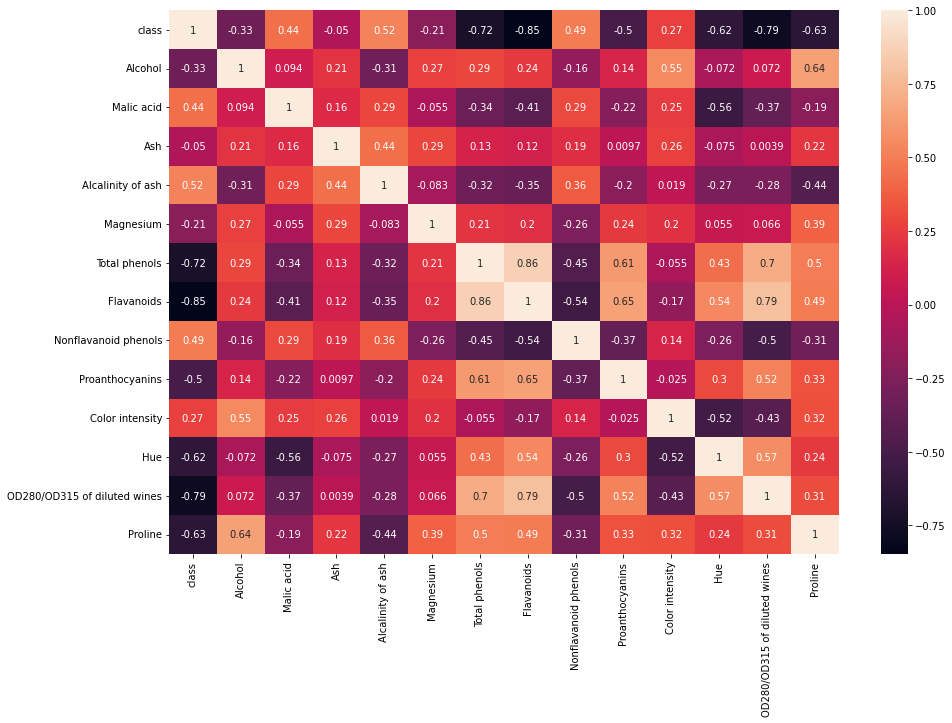

In [62]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(wines_df.corr(), annot=True)
plt.show()

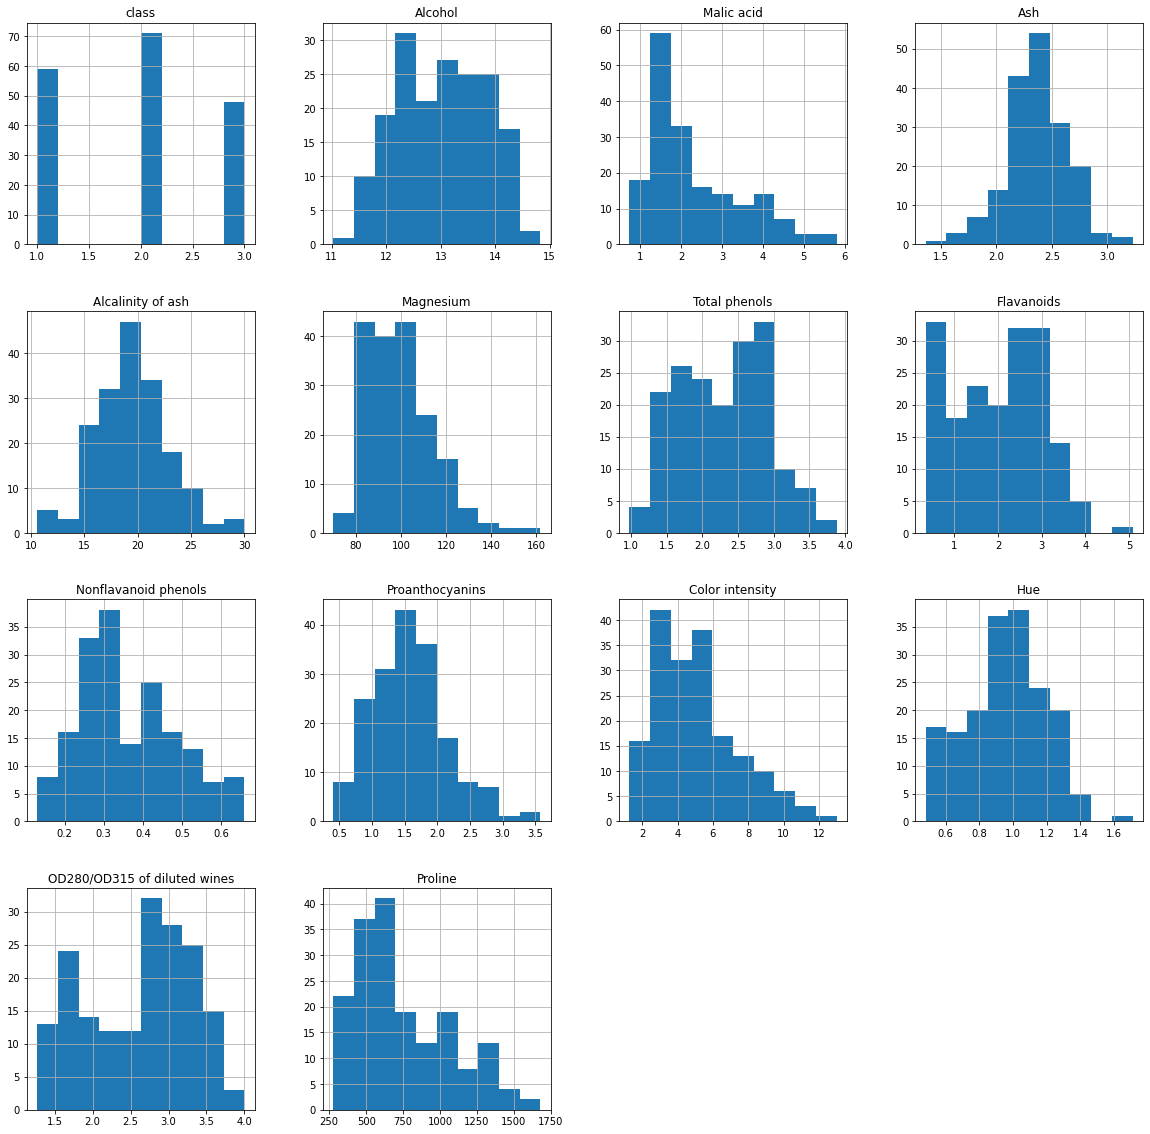

In [63]:
wines_df.hist(figsize=(20,20))
plt.show()

In [64]:
wines_X = wines_df[wines_df.columns.tolist()[1:]].copy()
wines_y = wines_df['class'].copy()

In [65]:
wines_X

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [66]:
wines_y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: class, Length: 178, dtype: int64

In [67]:
wines_X = scaler.fit_transform(wines_X)
wines_X = pd.DataFrame(wines_X)
wines_X.columns = wines_df.columns.tolist()[1:]

In [68]:
wines_X

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [69]:
wines_train_X, wines_test_X, wines_train_y, wines_test_y = train_test_split(wines_X, wines_y, random_state=0)

In [70]:
class GaussianBayesClassifier:
    def __init__(self):
        pass
    
    def train(self, train_X, train_y):
        '''
        Input: x,y (training data)
        
        Trains the model
        '''
        self.classes = list(np.unique(train_y))
        self.num_classes = len(self.classes)
        self.num_datapoints, self.num_features = train_X.shape
        
        self.classwise_variances = {}
        for Class in self.classes:
            self.classwise_variances[Class] = np.array(train_X[train_y == Class].cov())

        self.classwise_means = {}
        for Class in self.classes:
            self.classwise_means[Class] = np.mean(train_X[train_y == Class])
        
        self.class_priors = dict()
        for k in self.classes:
            self.class_priors[k] = np.count_nonzero(train_y == k)/self.num_datapoints
        
        
    def test(self, test_X):
        '''
        Input: testing data
        Output: predictions for every instance in the testing data as a numpy array
        '''
        test_X = np.array(test_X)
        
        pred_y = []
        for x in test_X:
            pred_y.append(self.predict(x))
        
        pred_y = np.array(pred_y)
        return pred_y
        
        
    def predict(self, test_X):
        '''
        Input: a single data point
        Output: predicted class
        '''
        classwise_predictions = {}
        for Class in self.classes:
            classwise_predictions[Class] = self.gi(test_X, Class)
            
        argmax_class = max(zip(classwise_predictions.values(), classwise_predictions.keys()))[1]
        return argmax_class
          
    def predict_proba(self, test_X):
        '''
        Input: a single data point
        Output: prediction probability of each class as a dictionary for the input data point
        '''
        classwise_predictions = {}
        total_prob = 0
        for Class in self.classes:
            prob = math.exp(self.gi(test_X, Class))
            classwise_predictions[Class] = prob
            total_prob += prob
            
        for Class in self.classes:
            classwise_predictions[Class] /= total_prob
            
        return classwise_predictions

    
    def gi(self, x, Class):
        '''
        Input:-
            x : feature vector
            Class: class for which we need to find the value of the discriminant function
        Output:-
            Value of discriminant function for the given vector and class
            (ignoring unnecessary terms that are not used in comparisions)
        '''
        mu = self.classwise_means[Class].copy()
        sigma = self.classwise_variances[Class].copy()
        
        sigma_inv = np.linalg.inv(sigma)
        sigma_det = np.linalg.det(sigma)
            
        return -0.5*(x - mu).T@sigma_inv@(x - mu) - 0.5*np.log(sigma_det) + np.log(self.class_priors[Class])


## Linear Discriminant Analysis implementation from scratch

In [71]:
class LDA:
    def __init__(self, n_components=None):
        '''
        Constructor for the Linear Discriminant Analysis Model
        
        n_components = number of components
        '''
        self.n_components = n_components
    
    
    def fit(self, train_X, train_y):
        '''
        Input: training dataset and labels
        
        Fits the dataset and labels into the model
        '''
        self.fit_X = np.array(train_X)
        self.fit_y = np.array(train_y)
        
        self.num_samples, self.num_features = train_X.shape
        self.feature_means = np.mean(train_X, axis=0)
                
        self.uniqueclasses = np.unique(train_y)
        self.classwise_features = dict()
        
        for Class in self.uniqueclasses:
            self.classwise_features[Class] = np.array(train_X[train_y == Class].copy())
            
        self.classwise_feature_means = dict()
        for Class in self.classwise_features.keys():
            self.classwise_feature_means[Class] = np.mean(self.classwise_features[Class], axis=0)
        
        self.classwise_cov_mats = dict()
        for Class in self.classwise_features.keys():
            feature_numpy = self.classwise_features[Class]
            feature_mean = self.classwise_feature_means[Class]
            
            cov_mat = np.zeros((self.num_features, self.num_features))
            
            for each in range(len(feature_numpy)):
                temp = feature_numpy[each] - feature_mean
                temp = temp.reshape((self.num_features, 1))
                cov_mat = cov_mat + np.dot(temp, temp.T)
                
            self.classwise_cov_mats[Class] = cov_mat
            
        self.create_within_class_scatter_matrix()
        self.create_between_class_scatter_matrix()
        
        eig_vals, eig_vecs = self.eigen_operations()
        if self.n_components is None:
            self.n_components = self.find_best_n_components()
        
        self.eigmat = eig_vecs[:,:self.n_components]
    
    
    def create_within_class_scatter_matrix(self):
        '''
        Creates the within-class scatter matrix
        '''
        self.SW = np.zeros(self.classwise_cov_mats[self.uniqueclasses[0]].shape)
        
        for Class in self.classwise_cov_mats.keys():
            self.SW = self.SW + self.classwise_cov_mats[Class]
    
    
    def create_between_class_scatter_matrix(self):
        '''
        Creates the between-class scatter matrix
        '''
        self.SB = np.zeros(self.SW.shape)
        
        self.all_features_mean = np.array(self.fit_X.mean())
        
        for Class in self.classwise_features.keys():
            temp = self.classwise_feature_means[Class] - self.all_features_mean
            temp = temp.reshape((self.num_features, 1))
            self.SB = self.SB + len(self.classwise_features[Class])*np.dot(temp, temp.T)
    
    
    def eigen_operations(self):
        '''
        Returns eigen values (in sorted order) and corresponding eigen vectors using the scatter matrices 
        '''
        sw_inv = np.linalg.inv(self.SW)
        
        eig_val, eig_vec = np.linalg.eig(np.dot(sw_inv, self.SB))
        
        idx = eig_val.argsort()[::-1]
        eig_val = eig_val[idx]
        eig_vec = eig_vec[:,idx]
        
        return eig_val, eig_vec
    
    
    def transform(self, df):
        '''
        Input: dataset / dataframe
        
        Returns the transformed dataframe after Linear Discriminant Analysis
        '''
        if len(df.shape) == 1:
            return np.real(np.dot(df, self.eigmat))
    
        transformed_df = pd.DataFrame(np.real(np.dot(df, self.eigmat)))
        transformed_df.columns = [f'component-{num+1}' for num in range(self.n_components)]

        return transformed_df

    
    def find_best_n_components(self, threshold=0.95):
        '''
        Input: threshold
        
        Automatically returns the best number of linear discriminants based upon
        the percentage of variance that needs to be conserved (threshold)
        '''
        eig_vals, eig_vecs = self.eigen_operations()
        
        current_threshold = 0
        best_n = 1
        
        eig_vals_sum = np.sum(eig_vals)
        eig_vals_cumsum = np.cumsum(eig_vals)
        
        for n in range(len(eig_vals)):
            if eig_vals_cumsum[n]/eig_vals_sum > threshold:
                break
            best_n += 1
        
        return best_n
    
    
    def euclidean_distance(self, point1, point2):
        '''
        Input: 2 data points
        
        Returns the euclidean distance between the inputs
        '''
        return np.linalg.norm(point1 - point2)
    
    
    def predict_single_datapoint(self, test_X):
        '''
        Input: a single test data point

        Predicts and returns the best matching class for the input
        '''
        transformed_datapoint = np.array(self.transform(test_X))
        
        best_class = self.uniqueclasses[0]
        shortest_distance = \
            self.euclidean_distance(transformed_datapoint, np.array(self.transform(self.classwise_feature_means[best_class])))
        
        for Class in self.classwise_feature_means.keys():
            if Class is not best_class:
                class_mean = np.array(self.transform(self.classwise_feature_means[Class]))
                dist = self.euclidean_distance(transformed_datapoint, class_mean)
                if dist < shortest_distance:
                    shortest_distance = dist
                    best_class = Class

        return best_class


    def predict(self, test_X):
        '''
        Input: test dataset / dataframe 
        
        Returns the model predictions for the input
        '''
        test_X = np.array(test_X)
        prediction_array = list()
        
        for each in test_X:
            prediction_array.append(self.predict_single_datapoint(each))
        
        return np.array(prediction_array)


    def predict_gnb(self, test_X):
        '''
        Input: test dataset / dataframe 
        
        Returns the model predictions for the input
        (based on Gaussian Naive Bayes)
        '''
        train_X = self.transform(self.fit_X)
        test_X = self.transform(test_X)
        train_y = self.fit_y
        
        model = GaussianBayesClassifier()
        model.train(train_X, train_y)

        return model.test(test_X)
       
        
    def predict_proba(self, test_X):
        '''
        Input: test dataset
        
        Returns an array of dictionaries with prediction probabilities of each class for each input data point
        '''
        train_X = self.transform(self.fit_X)
        test_X = np.array(self.transform(test_X))
        train_y = self.fit_y
        
        model = GaussianBayesClassifier()
        model.train(train_X, train_y)
        
        prob_arr = list()
        for each in range(len(test_X)):
            prob_arr.append(model.predict_proba(test_X[each]))

        return prob_arr
            
        
#     def scores_transform(self):
#         '''
#         Returns the score column for the training dataset
#         '''
#         eig_vals, eig_vecs = self.eigen_operations()
#         transformed_data = np.dot(self.fit_X, eig_vecs)
        
#         return np.real(np.sum(transformed_data, axis=1))
    
    
#     def gaussian(self, x, _mean, _std):
#         '''
#         Returns probability based on Gaussian Bayes Distribution
#         '''
#         return (1/math.sqrt(2*math.pi))*math.exp(-0.5*((x-_mean)/_std)**2)/_std
    
    
#     def proba(self):
#         '''
#         Returns array of probabilities corresponding to each row to belong to its corresponding class 
#         '''
#         scores_df = pd.DataFrame(self.scores_transform())
#         scores_np = np.array(scores_df)
#         scores_df.columns = ['scores']
#         scores_df['class'] = self.fit_y
        
#         scores_means = dict()
#         scores_stds = dict()
        
#         for Class in self.uniqueclasses:
#             class_df = scores_df['scores'][scores_df['class']==Class]
#             mean = float(np.mean(class_df))
#             std = float(np.std(class_df))
            
#             scores_means[Class] = mean
#             scores_stds[Class] = std
        
#         proba_list = list()
#         for each in range(len(scores_np)):
#             x = float(scores_np[each])
#             Class = self.fit_y[each]
#             proba_list.append(self.gaussian(x, scores_means[Class], scores_stds[Class]))
        
#         proba_list = np.array(proba_list)
#         return np.array(proba_list)
    
        
    def score(self, test_X, test_y):
        '''
        Input: test data and labels
        
        Returns the accuracy score of the model on the input
        '''
        test_X = np.array(test_X)
        test_y = np.array(test_y)
        
        pred_y = self.predict_gnb(test_X)
        
        acc_score = 0
        
        for each in range(len(test_X)):
            if(pred_y[each] == test_y[each]):
                acc_score += 1
                
        acc_score /= len(test_X)
        return acc_score
    
    
    def scatter_plot_for_best_features(self):
        '''
        Scatter plot to visualize the feature space for the
        features that have a high impact on the classification tasks
        '''
        transformed_data = self.transform(self.fit_X)
        
        fig = plt.figure(figsize=(7,7))
        
        colors = ['c', 'm', 'y', 'b', 'g', 'r']
        
        color_counter = 0
        for each in self.uniqueclasses:
            x = transformed_data['component-1'][self.fit_y==each]
            y = transformed_data['component-2'][self.fit_y==each]
            plt.scatter(x, y, color=colors[color_counter], label=f'class-{each}')
            color_counter += 1
        plt.xlabel('component-1')
        plt.ylabel('component-2')
        plt.legend()
        plt.show()
        
        
    def decision_boundary_plot(self, model, X, y):
        '''
        Plots the scatter plot of any two features among the features 
        which contribute to the maximum variance the decision boundary
        '''
        train_X = self.transform(X)
        train_y = y
        
        model.fit(train_X, train_y)
        
        h = 0.02
        
        xf1 = train_X['component-1'].to_numpy()
        xf2 = train_X['component-2'].to_numpy()
        train_y = train_y.to_numpy()

        x_min, x_max = xf1.min() - 10*h, xf1.max() + 10*h
        y_min, y_max = xf2.min() - 10*h, xf2.max() + 10*h
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        fig = plt.figure(figsize=(5,5))
        plt.contourf(xx, yy, Z, alpha=0.25)
        plt.contour(xx, yy, Z, colors='k', linewidths=0.7)

        plt.scatter(xf1, xf2, c=train_y, edgecolors='k')
        plt.xlabel('component-1')
        plt.ylabel('component-2')
        plt.show()
        

In [72]:
lda_scratch = LDA()
lda_scratch.fit(wines_train_X, wines_train_y)
lda_scratch.transform(wines_train_X)

,component-1,component-2
0,-1.276667,1.154566
1,1.395060,0.568621
2,0.049044,-1.221473
3,1.320208,1.284453
4,-1.318673,1.696074
...,...,...
128,0.700439,-2.330594
129,-0.230699,-1.637732
130,0.023666,-2.238550
131,-1.409689,0.496094


In [73]:
lda_scratch.predict_gnb(wines_test_X)

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 2,
       2], dtype=int64)

In [74]:
lda_scratch.score(wines_test_X, wines_test_y)

1.0

In [75]:
lda_scratch.predict_proba(wines_test_X)

[{1: 0.9999997933924454, 2: 2.066075546940529e-07, 3: 1.4315438904763925e-26},
 {1: 2.4378010978641377e-28, 2: 1.3432819317762757e-07, 3: 0.9999998656718069},
 {1: 2.8162128666422192e-06, 2: 0.9999971829646643, 3: 8.224690862529941e-10},
 {1: 0.998194624635817, 2: 0.001805375364179758, 3: 3.2489269688892206e-15},
 {1: 0.0008676560481640896, 2: 0.9991319853819752, 3: 3.585698607890213e-07},
 {1: 0.006452941312871386, 2: 0.9935470586871287, 3: 7.50008071018909e-25},
 {1: 0.9999999999948039, 2: 5.196058383592552e-12, 3: 6.04012575377974e-37},
 {1: 8.252211741037857e-27, 2: 1.5909786390210947e-06, 3: 0.9999984090213611},
 {1: 0.00040923294057513876, 2: 0.9995907669732944, 3: 8.613040524900343e-11},
 {1: 5.294258523683902e-06, 2: 0.9999907588665501, 3: 3.946874926362885e-06},
 {1: 4.411069555089044e-12, 2: 0.005973062950417719, 3: 0.9940269370451712},
 {1: 7.645815836185532e-28, 2: 1.1384769453126324e-07, 3: 0.9999998861523055},
 {1: 0.99999999999973, 2: 2.6995270828731684e-13, 3: 1.4950352

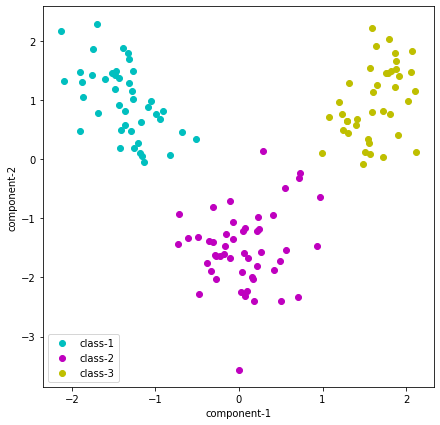

In [76]:
lda_scratch.scatter_plot_for_best_features()

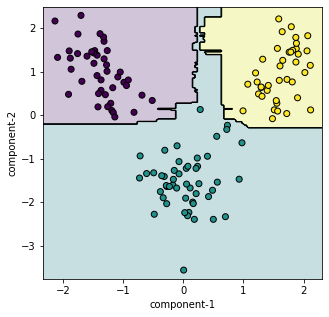

In [77]:
lda_scratch.decision_boundary_plot(RandomForestClassifier(), wines_train_X, wines_train_y)

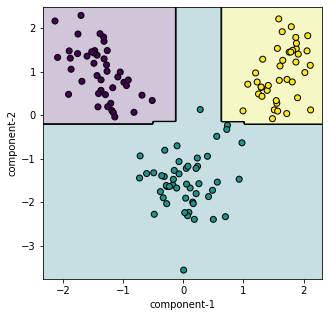

In [78]:
lda_scratch.decision_boundary_plot(BaggingClassifier(), wines_train_X, wines_train_y)

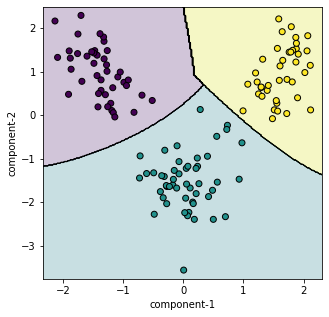

In [79]:
lda_scratch.decision_boundary_plot(SVC(), wines_train_X, wines_train_y)

In [80]:
comp_models = [RandomForestClassifier(), BaggingClassifier(), SVC()]
comp_model_names = ['RandomForestClassifier', 'BaggingClassifier', 'SVMClassifier']

In [81]:
def pca_vs_lda(n_components, models, model_names, train_X, train_y, test_X, test_y):
    # PCA
    pca = PCA(n_components=n_components)
    pca.fit(train_X)
    pca_train_X = pca.transform(train_X)
    pca_test_X = pca.transform(test_X)

    # LDA
    lda = LDA(n_components=None)
    lda.fit(train_X, train_y)
    lda_train_X = lda.transform(train_X)
    lda_test_X = lda.transform(test_X)
    
    # training the classifiers
    for each in range(len(models)):
        print(f'Classifier: {model_names[each]}')
        modelpca = models[each].fit(pca_train_X, train_y)
        modellda = models[each].fit(lda_train_X, train_y)
        print(f'Accuracy score for PCA: {modelpca.score(pca_test_X, test_y)}')
        print(f'Accuracy score for LDA: {modellda.score(lda_test_X, test_y)}')
        print()


In [82]:
pca_vs_lda(2, comp_models, comp_model_names, wines_train_X, wines_train_y, wines_test_X, wines_test_y)

Classifier: RandomForestClassifier
Accuracy score for PCA: 0.0
Accuracy score for LDA: 0.9777777777777777

Classifier: BaggingClassifier
Accuracy score for PCA: 0.06666666666666667
Accuracy score for LDA: 0.9777777777777777

Classifier: SVMClassifier
Accuracy score for PCA: 0.0
Accuracy score for LDA: 1.0



## 5-fold cross-validation, ROC plotting, and AUC calculation from scratch 

In [83]:
def prob_vector(model, test_X, Class):
    probas = model.predict_proba(test_X)
    return np.array([probas[each][Class] for each in range(len(probas))])

In [84]:
def thresholds(num):
    return np.array([each/num for each in range(num+1)])

In [85]:
def plot_ROC(y_test, y_pred_proba, num_thresholds=100):
    roc_x, roc_y = [1], [1]
    
    idx = y_pred_proba.argsort()[::-1]
    y_pred_proba = y_pred_proba[idx]
    y_test = y_test[idx]
    
    thresh = thresholds(num_thresholds)
    for th in range(num_thresholds):
        tp, fp, tn, fn = 0, 0, 0, 0
        for each in range(len(y_test)):
            actual_class = y_test[each]
            
            predicted_class = 0 
            if y_pred_proba[each] >= thresh[th]:
                predicted_class = 1
                
            if actual_class==1 and predicted_class==1:
                tp += 1
            elif actual_class==1 and predicted_class==0:
                fn += 1
            elif actual_class== 0 and predicted_class==1:
                fp += 1
            else:
                tn += 1
            
        tpr = tp/(tp+fn)
        fpr = fp/(fp+tn)
        
        roc_x.append(fpr)
        roc_y.append(tpr)
            
    roc_x.append(0)
    roc_y.append(0)
            
    roc_x = roc_x[::-1]
    roc_y = roc_y[::-1]
        
    auc = abs(np.trapz(roc_y, roc_x))
    
    plt.plot(roc_x, roc_y, label=f'AUC = {auc}')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.show()


In [86]:
def Kfold_scratch(X, y, n_splits=5):
    model = LDA()
    
    df = pd.DataFrame(X)
    df['y'] = y
    df = np.array(df)
    np.random.shuffle(df)
    
    unique_classes = np.unique(y)
    
    num_samples = df.shape[0]
    indices = list()
    len_split = num_samples//n_splits
    for each in range(0, num_samples+1, len_split):
        indices.append(each)
    
    indices[-1] = num_samples
        
    folds_X = list()
    folds_y = list()
    
    for ind in range(n_splits):
        curr_ind = indices[ind]
        next_ind = indices[ind+1]
        folds_X.append(df[curr_ind:next_ind, :-1])
        folds_y.append(df[curr_ind:next_ind, -1])
    
    cross_validation_scores = list()
    
    for ind in range(len(folds_X)):
        temp = list()
        test_X, test_y = folds_X[ind], folds_y[ind]
        train_X, train_y = 0, 0
        check = 0
        
        for each in range(len(folds_X)):
            if each != ind:
                if check == 0:
                    train_X = folds_X[each]
                    train_y = folds_y[each]
                    check = 1
                else:
                    train_X = np.vstack(folds_X[each])
                    train_y = np.vstack(folds_y[each])[:, 0]
        
        model.fit(train_X, train_y)
        cross_validation_scores.append(model.score(test_X, test_y))
        
        for pos_class in unique_classes:
            print(f'ROC curve for class-{pos_class}')
            copy_test_y = np.array(test_y)
            copy_pred_y = prob_vector(model, test_X, pos_class)
            for each in range(len(test_y)):
                if copy_test_y[each] == pos_class:
                    copy_test_y[each] = 1
                else:
                    copy_test_y[each] = 0

            plot_ROC(copy_test_y, copy_pred_y)
        print('-'*100)
        print()
    
    cross_validation_scores = np.array(cross_validation_scores)
    
    print(f'individual cross-validation_scores: {cross_validation_scores}')
    print(f'average cross-validation score: {np.mean(cross_validation_scores)}')
    print()


ROC curve for class-1


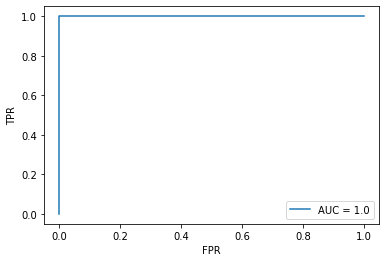

ROC curve for class-2


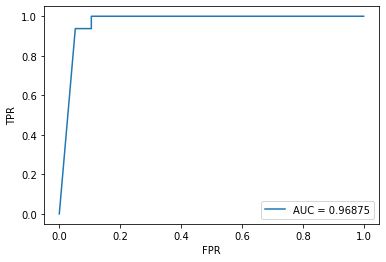

ROC curve for class-3


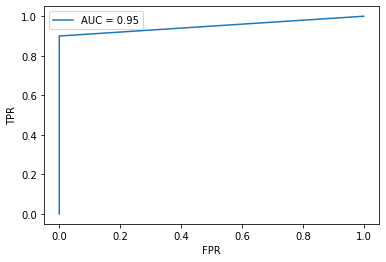

----------------------------------------------------------------------------------------------------

ROC curve for class-1


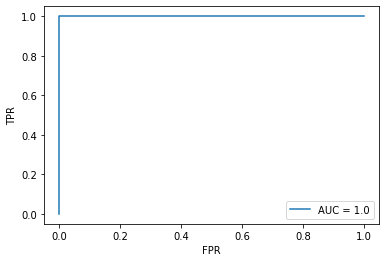

ROC curve for class-2


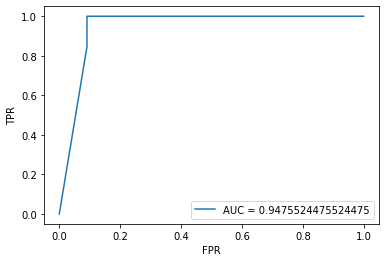

ROC curve for class-3


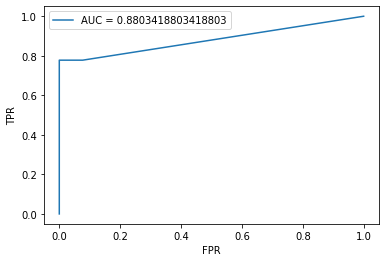

----------------------------------------------------------------------------------------------------

ROC curve for class-1


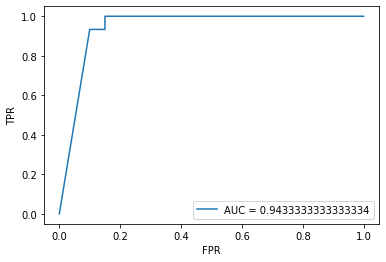

ROC curve for class-2


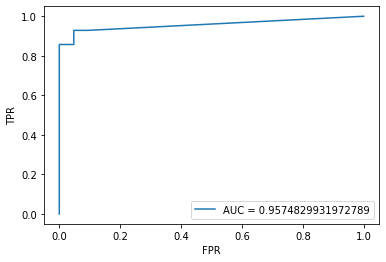

ROC curve for class-3


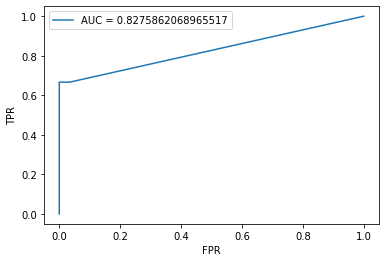

----------------------------------------------------------------------------------------------------

ROC curve for class-1


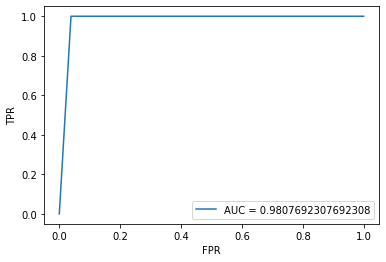

ROC curve for class-2


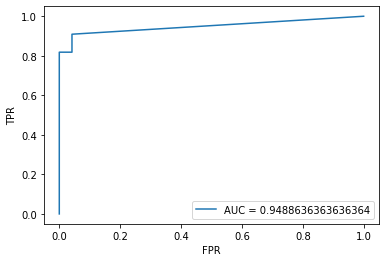

ROC curve for class-3


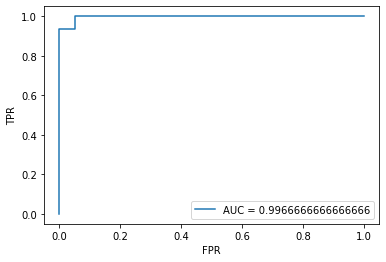

----------------------------------------------------------------------------------------------------

ROC curve for class-1


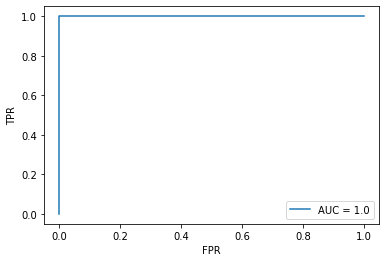

ROC curve for class-2


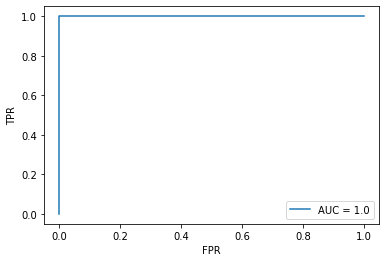

ROC curve for class-3


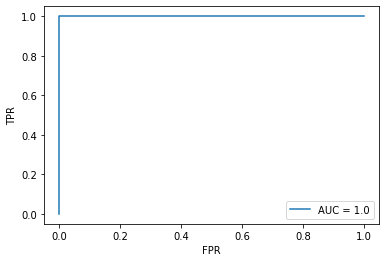

----------------------------------------------------------------------------------------------------

individual cross-validation_scores: [0.94285714 0.91428571 0.88571429 0.94285714 1.        ]
average cross-validation score: 0.9371428571428572



In [87]:
Kfold_scratch(wines_X, wines_y)